<center><h1 style="font-size:2em;color:#2467C0">Proyecto: Digitalizando Números</h1></center>


# Librerias importantes

In [1]:
#pip install opencv-python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv

# Transformación de la imagen

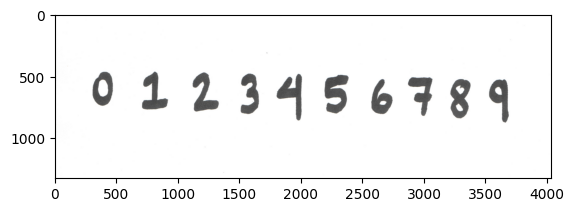

In [2]:
img=cv.imread('figuras/numeros_c.jpg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
#plt.figure(figsize = (5,5))
plt.imshow(img)
plt.show()

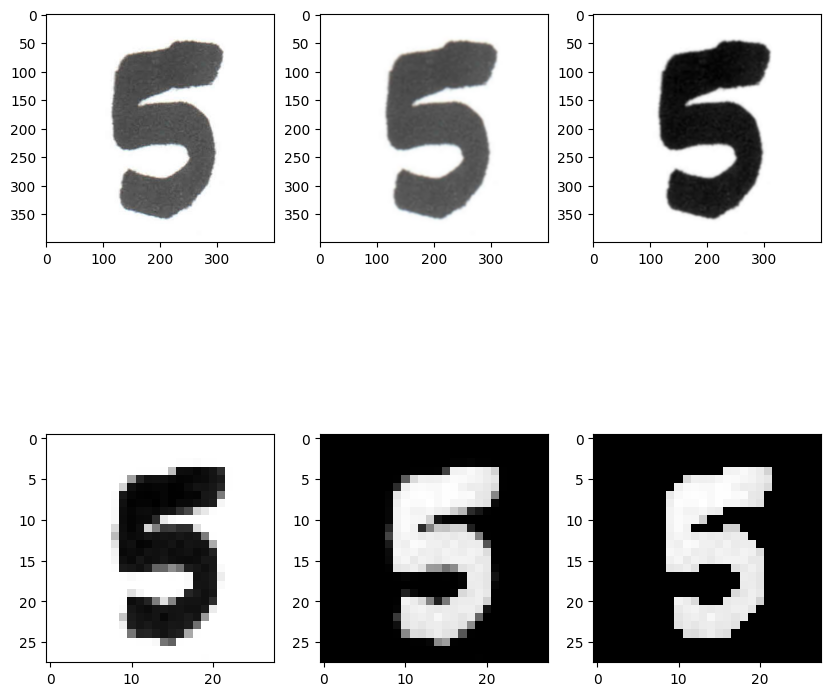

In [3]:
# Realizar la transformación para un número
# mis_numeros/num_?.jpg

img = cv.imread("mis_numeros/num_5.jpg")
img_Ga = cv.GaussianBlur(img, (7, 7), 0)
img_g = cv.cvtColor(img_Ga, cv.COLOR_BGR2GRAY)
img_r = cv.resize(img_g, (28, 28), interpolation = cv.INTER_NEAREST)
img_i = cv.bitwise_not(img_r)
#En el siguiente punto es necesario ajustar el valor de 130 al más adecuado
thr, img_f = cv.threshold(img_i, 150, 255, cv.THRESH_TOZERO)
#plt.imshow(img_f, cmap = "gray")
#plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.subplot(2, 3, 2)
plt.imshow(img_Ga)
plt.subplot(2, 3, 3)
plt.imshow(img_g, cmap = "gray")
plt.subplot(2, 3, 4)
plt.imshow(img_r, cmap = "gray")
plt.subplot(2, 3, 5)
plt.imshow(img_i, cmap = "gray")
plt.subplot(2, 3, 6)
plt.imshow(img_f, cmap = "gray")
plt.show()


# Arreglo de numpy

In [4]:
# Mostrar los números del arreglo sobre la imagen

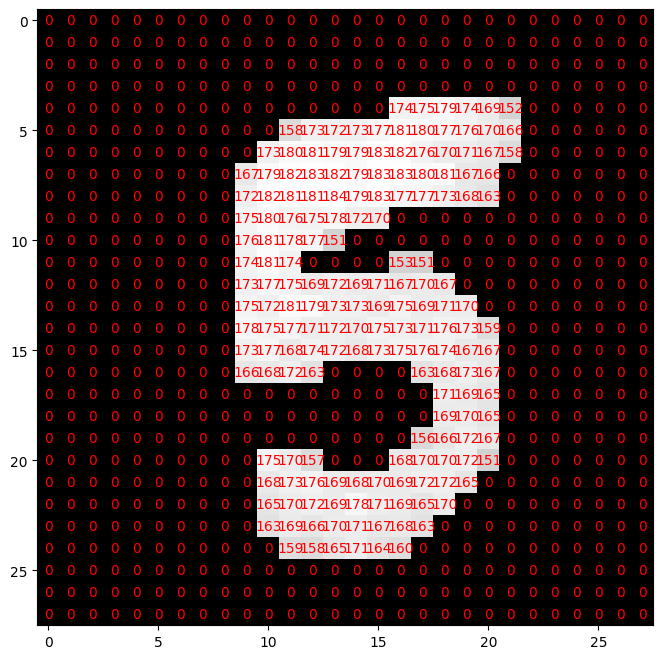

In [5]:
plt.figure(figsize= (8, 8))
plt.imshow(img_f, cmap = "gray")

for (j, i), label in np.ndenumerate(img_f):
    plt.text(i, j, label, ha = "center", va = "center", color = "red")
plt.show()
            

# DataFrame de pandas

In [6]:
#Creamos uns función para transformar la imagen
def digits(img):
    img_Ga = cv.GaussianBlur(img, (7, 7), 0)
    img_g = cv.cvtColor(img_Ga, cv.COLOR_BGR2GRAY)
    img_r = cv.resize(img_g, (28, 28), interpolation = cv.INTER_NEAREST)
    img_i = cv.bitwise_not(img_r)
    #En el siguiente punto es necesario ajustar el valor de 130 al más adecuado
    thr, img_f = cv.threshold(img_i, 150, 255, cv.THRESH_TOZERO)
    return(img_f)

0


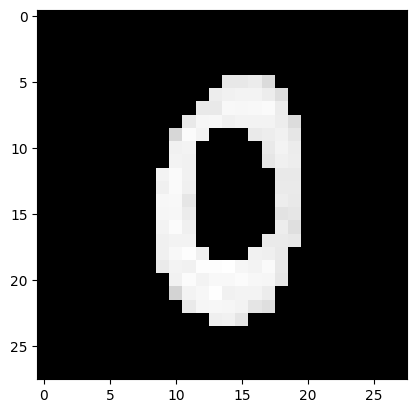

1


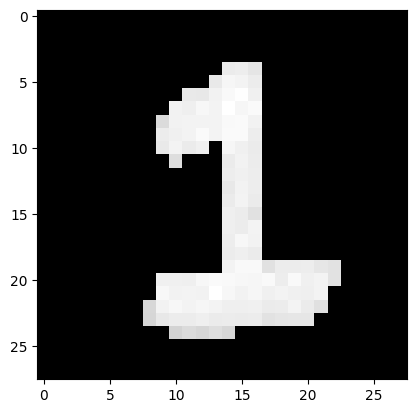

2


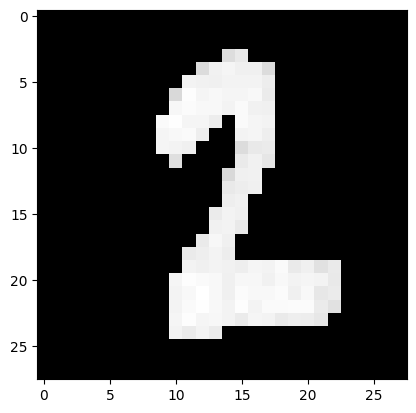

3


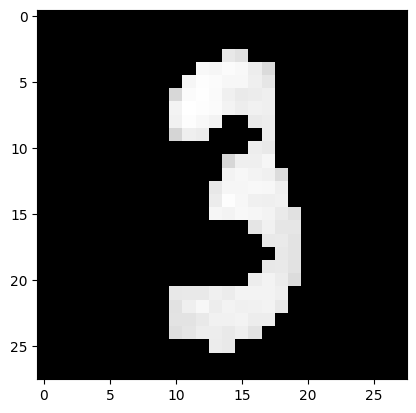

4


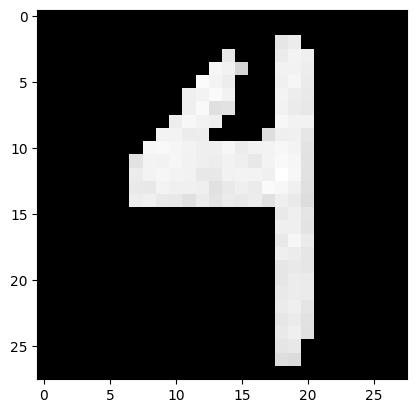

5


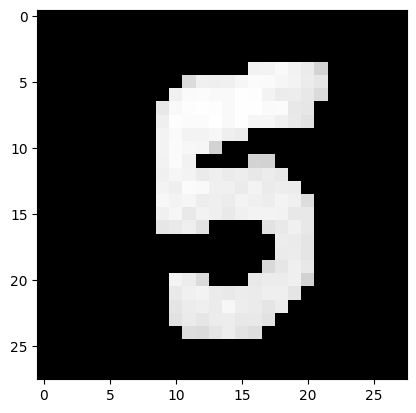

6


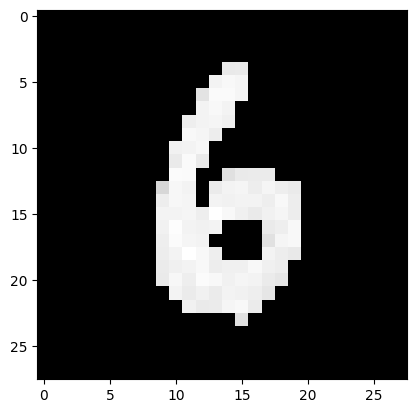

7


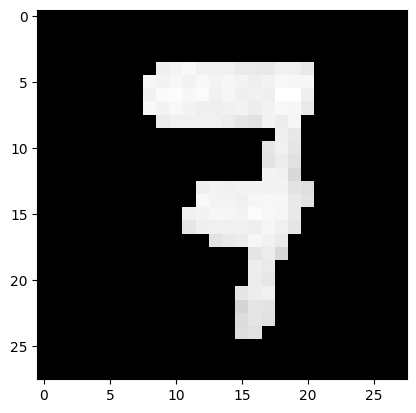

8


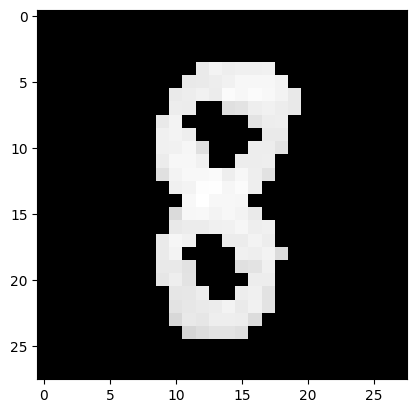

9


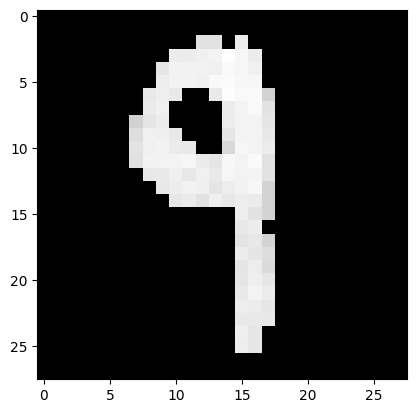

In [7]:
#Crear el DataFrame
#Creación de DataFrame
from glob import glob
contador = 0

df = pd.DataFrame()

for fn in glob("mis_numeros/num_*.jpg"):
    print(contador)
    img_f = digits(cv.imread(fn))
    plt.imshow(img_f, cmap = "gray")
    plt.show()
    fila = np.append(contador, img_f.flatten())
    fila = fila.reshape(1, 785)
    #df = df.append(pd.DataFrame(fila))
    df = pd.concat([df, pd.DataFrame(fila)], ignore_index=True)
    contador = contador +1 

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exportar a un archivo CSV

In [9]:
#Exportar a un archivo csv en el directorio datos/

In [10]:
df.to_csv("datos/mis_numeros.csv", header= False, index = False)